<a href="https://colab.research.google.com/github/kibarmustofa/2341720034_ML_2025/blob/main/JS10/TG_JS10_2341720034_KIBAR_MUSTOFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS 1


1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai
k
k yang terbaik? Lampirkan grafika analisis dan alasan Anda.

##Langkah 1 - Load Data

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


##Langkah 2 - Eksplorasi Data

In [ ]:
data.info()
data.describe()
data['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,count
label,
male,1584
female,1584


##Langkah 3 - Visualisasi Data

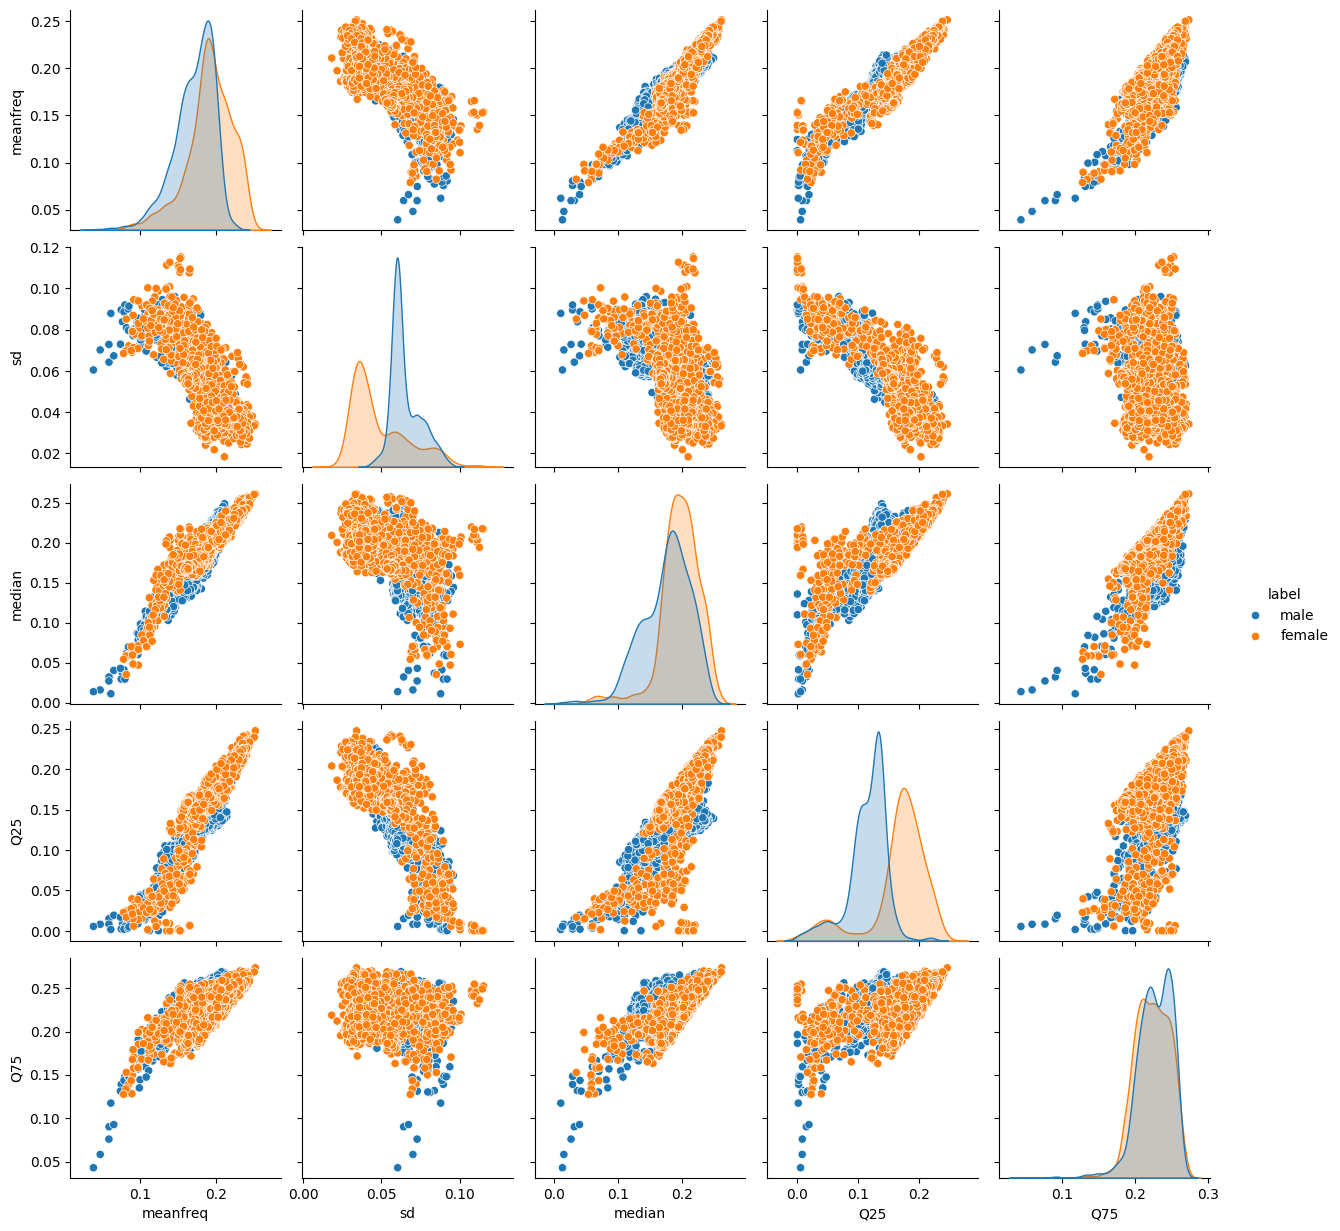

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


subset = data[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'label']]
sns.pairplot(subset, hue='label')
plt.show()


##Langkah 4 - Preprocessing


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])  # male=1, female=0

# Pisahkan fitur dan label
X = data.drop('label', axis=1)
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Langkah 5 - Buat Model k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3) berdasarkan contoh
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##Langkah 6 - Evaluasi Model k-NN

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=['female', 'male']))


Akurasi: 0.9768664563617245

Confusion Matrix:
 [[440  12]
 [ 10 489]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

      female       0.98      0.97      0.98       452
        male       0.98      0.98      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



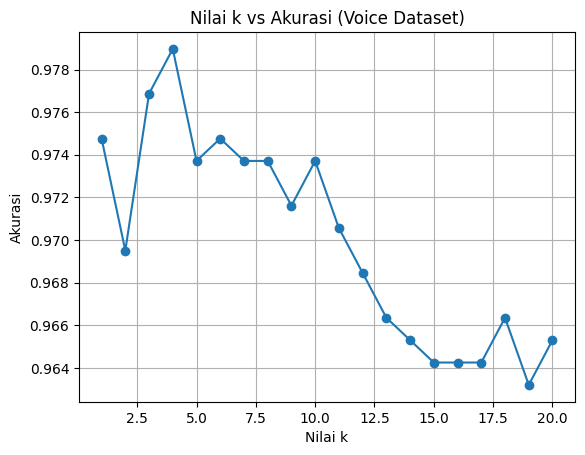

Nilai k terbaik adalah 4 dengan akurasi 97.90%


In [ ]:
acc = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 21), acc, marker='o')
plt.title('Nilai k vs Akurasi (Voice Dataset)')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

best_k = acc.index(max(acc)) + 1
print(f"Nilai k terbaik adalah {best_k} dengan akurasi {max(acc)*100:.2f}%")

## Langkah 7 - Evaluasi Nilai k (Mencari k Terbaik)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("5 fitur terbaik berdasarkan ANOVA:", list(selected_features))

5 fitur terbaik berdasarkan ANOVA: ['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun']


##Langkah 8 (Opsional) - Seleksi Fitur Terbaik

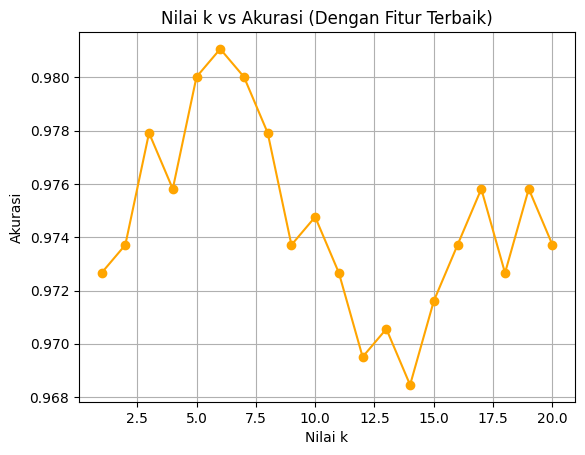

Nilai k terbaik dengan fitur terpilih adalah 6, dengan akurasi 98.11%


In [ ]:
X_selected = data[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Uji berbagai nilai k
acc_selected = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc_selected.append(model.score(X_test, y_test))

plt.plot(range(1, 21), acc_selected, marker='o', color='orange')
plt.title('Nilai k vs Akurasi (Dengan Fitur Terbaik)')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

best_k = acc_selected.index(max(acc_selected)) + 1
print(f"Nilai k terbaik dengan fitur terpilih adalah {best_k}, dengan akurasi {max(acc_selected)*100:.2f}%")


## Kesimpulan
1. Fitur yang paling berpengaruh buat bedain suara laki-laki dan perempuan itu adalah meanfreq, sd, median, Q25, dan Q75.
Fitur-fitur ini mengambil bagian penting dari karakteristik frekuensi suara — kayak seberapa tinggi-rendah, seberapa bervariasi, dan penyebaran frekuensinya.

2. Nilai k terbaik ada di k = 6, karena di titik itu model dapet akurasi paling tinggi, sekitar 98%. Nilai ini juga cocok karena model jadi tidak terlalu sensitif sama noise tetapi tetap akurat.




#TUGAS 2



Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data spam.csv

2. Fitur CountVectorizer dengan mengaktifkan stop_words

3. Evaluasi hasilnya

4. Buatlah model klasfikasi

Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data spam.csv

2. Fitur TF-IDF dengan mengaktifkan stop_words

3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

## Langkah 1 - Import library


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Langkah 2 - Load Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Langkah 3 - Preprocessing

In [ ]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=42
)

## Langkah 4 - Model 1: CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

model_count = MultinomialNB()
model_count.fit(X_train_count, y_train)
y_pred_count = model_count.predict(X_test_count)

# Evaluasi
print("=== HASIL DENGAN CountVectorizer ===")
print("Akurasi:", accuracy_score(y_test, y_pred_count))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_count))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_count))

=== HASIL DENGAN CountVectorizer ===
Akurasi: 0.9838565022421525

Confusion Matrix:
 [[959   6]
 [ 12 138]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Langkah 5 - Model 2: TF-IDF Vectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("\n=== HASIL DENGAN TF-IDF Vectorizer ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tfidf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_tfidf))


=== HASIL DENGAN TF-IDF Vectorizer ===
Akurasi: 0.9668161434977578

Confusion Matrix:
 [[965   0]
 [ 37 113]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



## Langkah 6 - Visualisasi Perbandingan

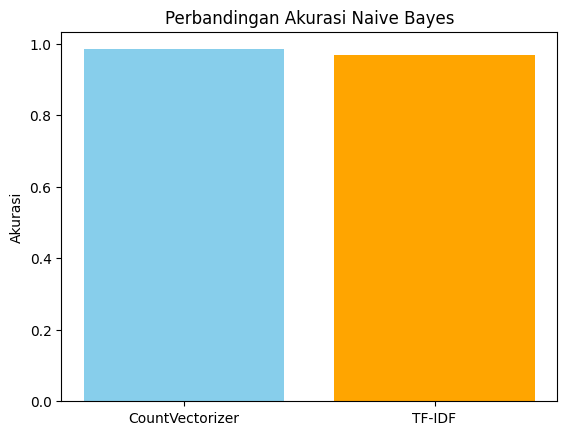

In [ ]:
akurasi_count = accuracy_score(y_test, y_pred_count)
akurasi_tfidf = accuracy_score(y_test, y_pred_tfidf)

plt.bar(['CountVectorizer', 'TF-IDF'], [akurasi_count, akurasi_tfidf], color=['skyblue', 'orange'])
plt.title('Perbandingan Akurasi Naive Bayes')
plt.ylabel('Akurasi')
plt.show()